Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.6160 - accuracy: 0.7888 - val_loss: 0.5139 - val_accuracy: 0.8167
Epoch 2/10
60000/60000 [==============================] - 44s 736us/sample - loss: 0.4684 - accuracy: 0.8349 - val_loss: 0.4923 - val_accuracy: 0.8266
Epoch 3/10
60000/60000 [==============================] - 39s 646us/sample - loss: 0.4381 - accuracy: 0.8446 - val_loss: 0.4725 - val_accuracy: 0.8341
Epoch 4/10
60000/60000 [==============================] - 39s 647us/sample - loss: 0.4176 - accuracy: 0.8519 - val_loss: 0.4683 - val_accuracy: 0.8318
Epoch 5/10
60000/60000 [==============================] - 39s 647us/sample - loss: 0.4046 - accuracy: 0.8559 - val_loss: 0.4396 - val_accuracy: 0.8430
Epoch 6/10
60000/60000 [==============================] - 39s 651us/sample - loss: 0.3902 - accuracy: 0.8607 - val_loss: 0.4994 - val_accuracy: 0.8236
Epoch 7/10
60000/60000 [======================

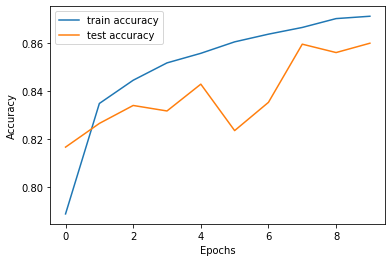

In [25]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from time import time

def main() :  
    
    #load db
    fashion_mnist = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    

    learning_rate = 0.1
    batch_size = 128


    
    #SCALE THIS data DURING 0 AND 1
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    
    #create model
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(512, activation='elu'),
        #keras.layers.Dense(512, activation='elu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    sgd = keras.optimizers.SGD(learning_rate)
    #compile model
    model.compile(optimizer=sgd, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    #learn model
    start = time()
    history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels),  epochs=10, batch_size= 128)
    train_time = time() - start
    print('\nTrain time: ', train_time)
    
    start = time()
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    test_time = time() - start
    print('\nTest accuracy:', test_acc)
    print('\nTest loss: ', test_loss)
    print('\nTest time: ', test_time)
    

    
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='test accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    

if __name__ == '__main__':
    main()
